## Customer segmentation based on RFM method and K-Means clustering


In this project we have performed customer segmentation by combining the RFM method and K-Means grouping. We used RFM scoring (assigned RFM score) and K-means clustering to determine segments of clients. The dataset includes sample sales data based on retail analytics and contains three years of sales.


**Customer segmentation**

The customer segmentation is an effective method that enables us to get better know our clients and to better correspond, their various needs. Almost every company that sells products or services stores data of shopping. This type of data can be used to execute customer segmentation thus, the results of the analysis can be translated into marketing campaigns to increase sales. One of the most widely used techniques is RFM analysis, which allows us to create personalized special offers to improve sales and decrease customer retention.

**RFM** stands for Recency, Frequency, Monetary Value and it is the technique of customer segmentation based on their transaction history. The RFM analysis is based on three criterias, which measure different customer characteristics:
-  Recency: Days since last purchase/order of the client;
- Frequency:  Total number of purchases the customer were made;
- Monetary Value: Total money the customer spent per order.

Customer segmentation can be performed using the classic RFM method, assigning them ratings from 1 to 4. Four is the best / highest value and one is the lowest / worst value. The final RFM score is calculated by combining the individual score numbers into one column to create RFM value classes for our customers. 


**Dataset**

The dataset comes from https://www.kaggle.com/kyanyoga/sample-sales-data.

### Import libriaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [7]:
df = pd.read_csv(r'C:\Users\Aryan Dalal\Downloads\sales_data_sample.csv',encoding = 'unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**First observations:**

In [8]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [10]:
#shape of data
df.shape

(2823, 25)

### Data cleaning

We have some unnecessary columns such as „ADDRESSLINE1”, „ADDRESSLINE2”, „POSTALCODE”, „TERRITORY”, „PHONE” and we remove them. We also can regroup the column 'PRODUCTINITIAL' use only three first signs. 

In [11]:
#remove columns
data=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE', 'TERRITORY', 'PHONE', 'CITY' , 'STATE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'MONTH_ID']
df.drop(data,axis=1,inplace=True)

In [12]:
# Regrouping product code.
df['PRODUCTINITIAL'] = df['PRODUCTCODE'].str[:3]
df.drop('PRODUCTCODE',axis=1,inplace=True)

In [13]:
df2 = df
df2.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,COUNTRY,DEALSIZE,PRODUCTINITIAL
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2003,Motorcycles,95,Land of Toys Inc.,USA,Small,S10
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,2003,Motorcycles,95,Reims Collectables,France,Small,S10
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,2003,Motorcycles,95,Lyon Souveniers,France,Medium,S10
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,2003,Motorcycles,95,Toys4GrownUps.com,USA,Medium,S10
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,2003,Motorcycles,95,Corporate Gift Ideas Co.,USA,Medium,S10


### Data Exploration

Checking null values:

In [14]:
df2.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
COUNTRY            0
DEALSIZE           0
PRODUCTINITIAL     0
dtype: int64

In [15]:
#checking unique values
df2.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
CUSTOMERNAME         92
COUNTRY              19
DEALSIZE              3
PRODUCTINITIAL        8
dtype: int64

In [16]:
df2['CUSTOMERNAME'].nunique()

92

In [17]:
# checking unique years
df2['YEAR_ID'].unique()

array([2003, 2004, 2005], dtype=int64)

After first observations we see that:
- We have no duplicates;
- No missing values;
- We have 92 unique clients for whom we will perform RFM analysis.

### Data visualization

Let's plot the data to get more insight:

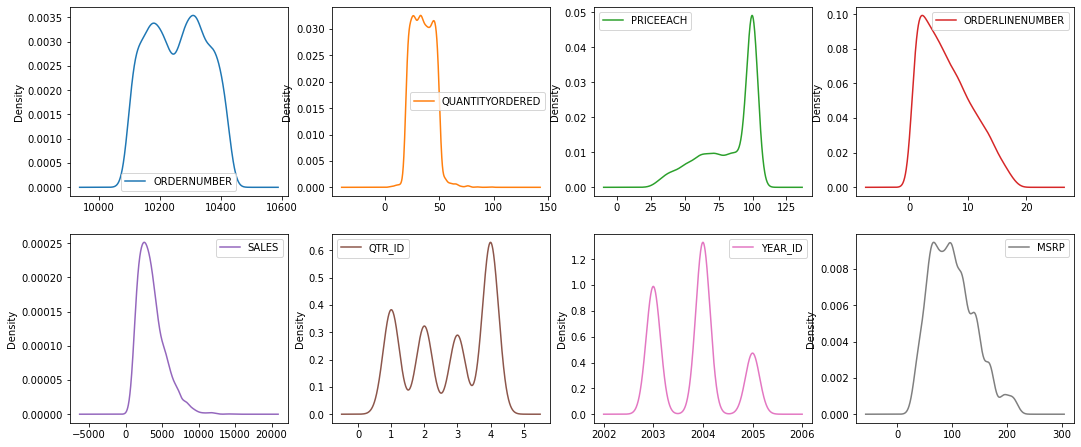

In [18]:
plt.rcParams['figure.figsize'] = [18, 16]
df2.plot(kind="density", subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

Majority of the data comes from 2003 and 2004 years (YEAR_ID). According to the data, most of the sales are within a certain price range. But we have a few outliers for "SALES" and "QUANTITYORDERED". We have skewed variables like "PRICEEACH", "ORDERLINENUMBER". We have also variables with a large discrepancy such as "PRICEEACH", "ORDERLINENUMBER", and "MSRP".

In [19]:
df2['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

The STATUS variable shows order status. Most of them is shipped.

Below plot of the distribution of Sales status:

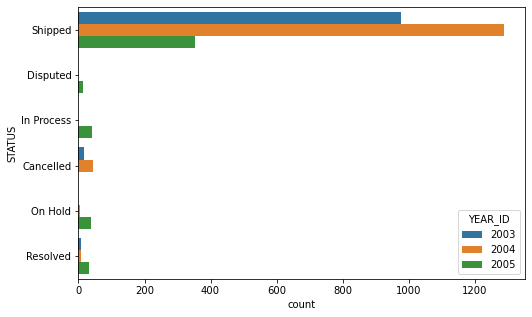

In [20]:
plt.rcParams['figure.figsize'] = [8, 5]
sns.countplot(y='STATUS',data=df2,hue='YEAR_ID', );

 Comparing Sales for each year:

In [21]:
df2.groupby(['YEAR_ID'])['SALES'].sum()

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

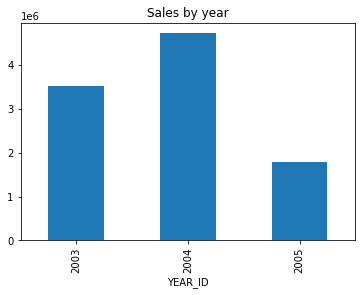

In [22]:
df2.groupby(['YEAR_ID'])['SALES'].sum().plot(kind='bar', figsize=(6,4), title='Sales by year');

The most sales were recorded in 2004 compared to 2003. We do not have all the data for 2005.

Comparing sales for each year(Quaterwise):

In [23]:
sales = df2.groupby(['YEAR_ID','QTR_ID']).agg({'SALES': lambda x: x.sum()})
sales

SALES
YEAR_ID QTR_ID            
2003    1        445094.69
        2        562365.22
        3        649514.54
        4       1860005.09
2004    1        833730.68
        2        766260.73
        3       1109396.27
        4       2014774.92
2005    1       1071992.36
        2        719494.35

In [24]:
sales.reset_index(inplace=True)
sales.head()

,YEAR_ID,QTR_ID,SALES
0,2003,1,445094.69
1,2003,2,562365.22
2,2003,3,649514.54
3,2003,4,1860005.09
4,2004,1,833730.68


C:\Users\Aryan Dalal\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


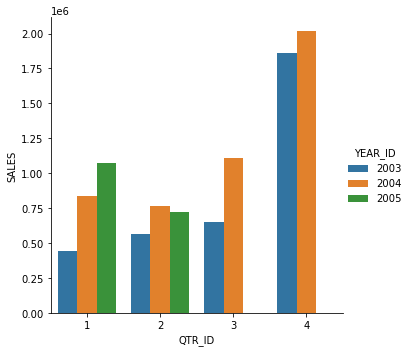

In [25]:
sns.factorplot(y='SALES', x='QTR_ID',data=sales,kind="bar" ,hue='YEAR_ID');

### RFM Analysis

For RFM analysis, we need only four columns: 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE' and 'SALES'.

In [26]:
col =['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
RFM = df2[col]
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2/24/2003 0:00,2871.00
1,Reims Collectables,10121,5/7/2003 0:00,2765.90
2,Lyon Souveniers,10134,7/1/2003 0:00,3884.34
3,Toys4GrownUps.com,10145,8/25/2003 0:00,3746.70
4,Corporate Gift Ideas Co.,10159,10/10/2003 0:00,5205.27


In [27]:
RFM.shape

(2823, 4)

In RFM clustering, it is usually assumed that only operations from the last 12 months are taken into account. The reason for this is simple: older operations can say little about the current situation of the seller, buyer, and the product itself. In order to set them, you need to adopt an agreed date for the grouping. In our data for "today" I will assume the day of the newest operation in the set.

In [28]:
RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')

C:\Users\Aryan Dalal\AppData\Local\Temp\ipykernel_31556\493735993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM['ORDERDATE'] = pd.to_datetime(RFM['ORDERDATE'], errors='coerce')


In [29]:
RFM.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2003-02-24,2871.00
1,Reims Collectables,10121,2003-05-07,2765.90
2,Lyon Souveniers,10134,2003-07-01,3884.34
3,Toys4GrownUps.com,10145,2003-08-25,3746.70
4,Corporate Gift Ideas Co.,10159,2003-10-10,5205.27


In [30]:
RFM['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [31]:
now = dt.datetime(2005,5,31)

**Create the RFM Table:**

Calculation of the "Recency" variable - information about how long ago the customer was shopping in the store:

In [32]:
rfm_df = RFM.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (now - x.max()).days}) 

"Frequency" and "Monetary value" I made by the using groupby method:

In [33]:
rfm_df['Frequency'] = RFM.groupby(by=['CUSTOMERNAME'])['ORDERNUMBER'].count()

In [34]:
rfm_df['MonetaryValue'] = RFM.groupby(by='CUSTOMERNAME').agg({'SALES': 'sum'})

In [35]:
rfm_df.head()

,ORDERDATE,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


In [36]:
rfm_df.rename(columns={'ORDERDATE': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",195,51,157807.81
Alpha Cognac,64,20,70488.44
Amica Models & Co.,264,26,94117.26
"Anna's Decorations, Ltd",83,46,153996.13
Atelier graphique,187,7,24179.96


### Model: RFM scoring + K-Means clustering 

In this approach we used RFM scoring(assigned RFM score) and K-means clustering.

**Transformation of variables:**

The next step is to transform all three variables. The RFM method requires ordinal variables and this can be done in several ways, we will use the percentiles of the distribution of the given variable. Scaling is not required. 

The labels will be values 1-4. When labeling the values of variables, it is important to remember that the higher label should mean the better situation of the person from the point of view of the seller. In the case of "Recency" - the smaller value of the variable, the higher label (we prefer clients who are active). In the case of "Frequency" - the greater value of the variable, the higher label (we prefer customers who buy more often and for large amounts).


In [43]:
r = pd.qcut(rfm_df.Recency, 4, labels = list(range(0,4)))

In [44]:
f = pd.qcut(rfm_df.Frequency, 4, labels = list(range(0,4)))

In [45]:
m = pd.qcut(rfm_df.MonetaryValue, 4, labels = list(range(0,)))

In [46]:
rfm_df_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
rfm_df_cutted

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",2,3,3
Alpha Cognac,0,1,1
Amica Models & Co.,3,1,2
"Anna's Decorations, Ltd",1,3,3
Atelier graphique,2,0,0
...,...,...,...
"Vida Sport, Ltd",3,2,2
Vitachrome Inc.,2,1,2
"Volvo Model Replicas, Co",2,0,1


Model: raw calculated RFM variables + K-Means Clustering
In this approach we have used raw calculated RFM variables (Recency, Frequency, MonetaryValue) and K-means clustering.

There are many outliers in our data so we have to apply normalization before modeling them.

In [57]:
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
CUSTOMERNAME,,,,
"AV Stores, Co.",195,51,157807.81,0
Alpha Cognac,64,20,70488.44,2
Amica Models & Co.,264,26,94117.26,5
"Anna's Decorations, Ltd",83,46,153996.13,3
Atelier graphique,187,7,24179.96,1


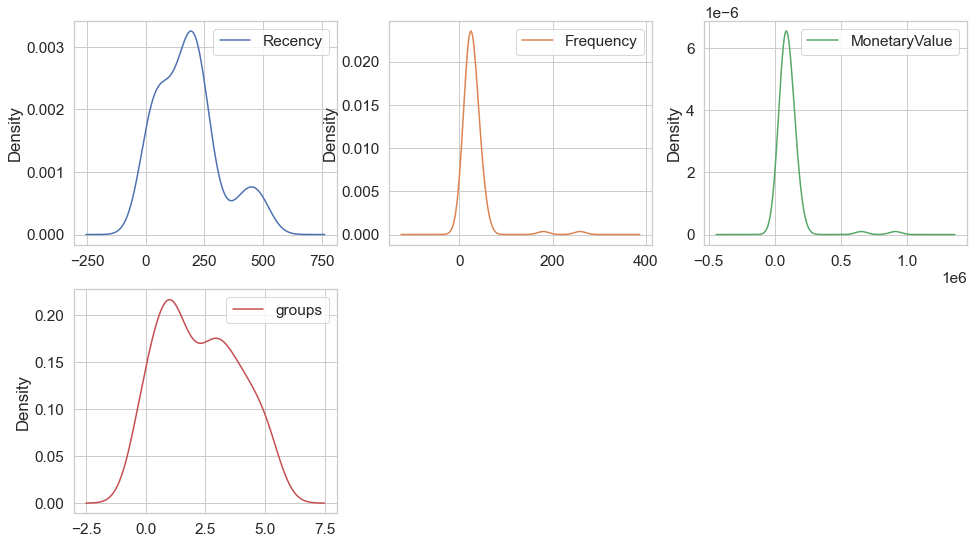

In [58]:
plt.rcParams['figure.figsize'] = [16, 14]
rfm_df.plot(kind="density", subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

C:\Users\Aryan Dalal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan Dalal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan Dalal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

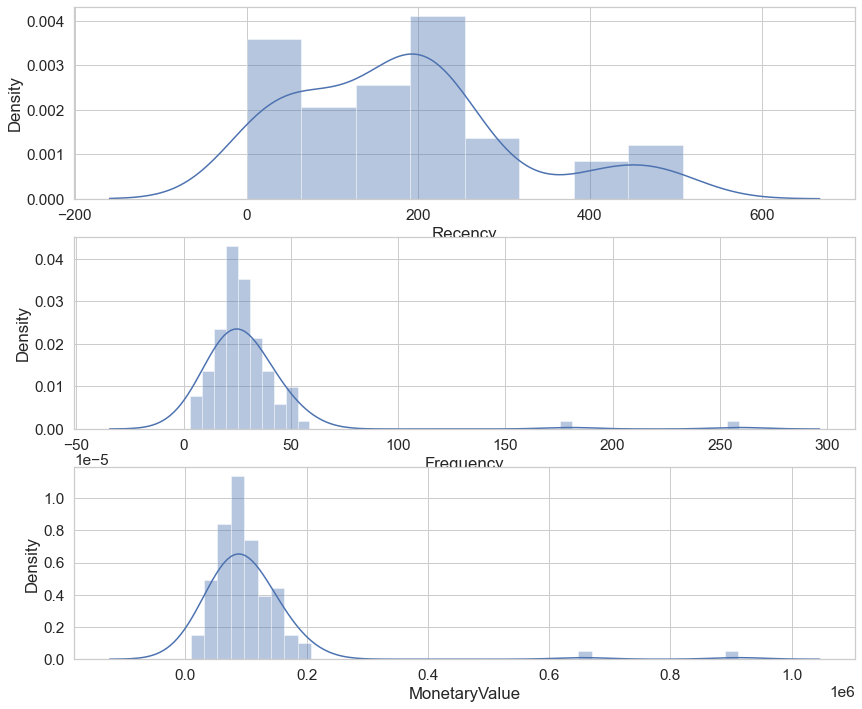

In [60]:
plt.figure(figsize=(14,12))
# Recency variable distribution 
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'])
# Frequency variable distribution 
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'])
# MonetaryValue variable distribution 
plt.subplot(3, 1, 3); sns.distplot(rfm_df['MonetaryValue'])

In [61]:
#checking statistics:
rfm_df.describe()

,Recency,Frequency,MonetaryValue,groups
count,92.000000,92.000000,92.000000,92.000000
mean,181.826087,30.684783,109050.313587,2.239130
std,131.420524,30.934503,110308.612808,1.606098
min,0.000000,3.000000,9129.350000,0.000000
25%,80.250000,19.750000,70129.432500,1.000000
50%,185.000000,26.000000,86522.610000,2.000000
75%,229.250000,32.500000,120575.875000,3.250000
max,508.000000,259.000000,912294.110000,5.000000


From above analysis we see that the minimum value for Recency for a specific client identifier is 0. So this transaction does not make sense and must be deleted. 

We also see that we do not get constant mean and standard deviation values. 

We drop client with 0 value from Recency:

In [62]:
rfm_df[rfm_df['Recency'] == 0]

,Recency,Frequency,MonetaryValue,groups
CUSTOMERNAME,,,,
Euro Shopping Channel,0,259,912294.11,3
La Rochelle Gifts,0,53,180124.90,3


In [63]:
rfm_df = rfm_df[rfm_df['Recency'] > 0]
rfm_df.reset_index(drop=True,inplace=True)

In [64]:
raw_data = rfm_df[['Recency','Frequency','MonetaryValue']]

In [65]:
raw_data.describe()

,Recency,Frequency,MonetaryValue
count,90.000000,90.000000,90.000000
mean,185.866667,27.900000,99335.664889
std,130.000104,19.475741,70991.470146
min,1.000000,3.000000,9129.350000
25%,84.500000,19.250000,69411.417500
50%,187.500000,25.500000,85363.790000
75%,229.750000,32.000000,117934.592500
max,508.000000,180.000000,654858.060000


In [66]:
# unskew the data
data_log = np.log(raw_data)

In [68]:
from sklearn.preprocessing import StandardScaler

# Now you can use StandardScaler in your code
scaler = StandardScaler()


In [69]:
# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

data_sc = scaler.transform(data_log)

In [70]:
df_norm = pd.DataFrame(data_sc, columns=raw_data.columns)

In [71]:
df_norm.head()

,Recency,Frequency,MonetaryValue
0,0.380566,1.417734,1.124103
1,-0.509786,-0.367558,-0.359312
2,0.622670,0.132816,0.172800
3,-0.302040,1.220944,1.079099
4,0.347089,-2.369750,-2.328643


Checking for skewness in the data now:

In [72]:
df_norm.head()

,Recency,Frequency,MonetaryValue
0,0.380566,1.417734,1.124103
1,-0.509786,-0.367558,-0.359312
2,0.622670,0.132816,0.172800
3,-0.302040,1.220944,1.079099
4,0.347089,-2.369750,-2.328643


C:\Users\Aryan Dalal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan Dalal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aryan Dalal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

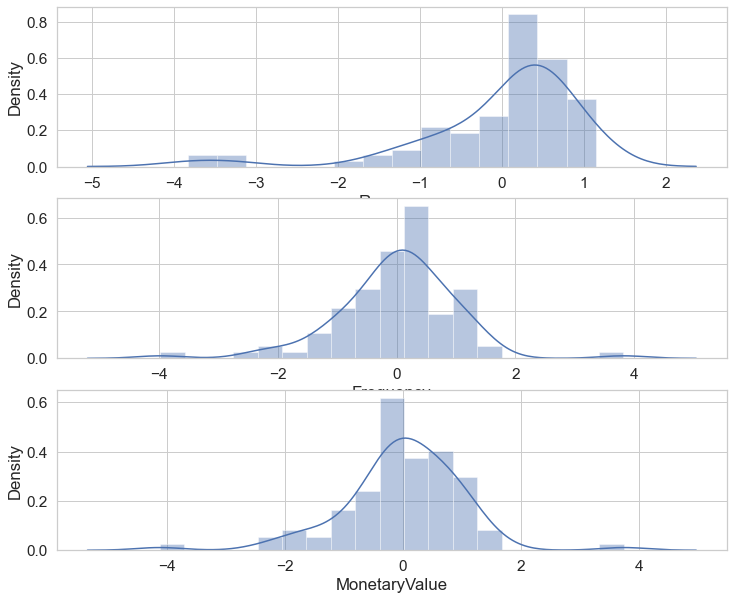

In [73]:
plt.figure(figsize=(12,10))
# Recency variable distribution 
plt.subplot(3, 1, 1); sns.distplot(df_norm['Recency'])
# Frequency variable distribution 
plt.subplot(3, 1, 2); sns.distplot(df_norm['Frequency'])
# MonetaryValue variable distribution 
plt.subplot(3, 1, 3); sns.distplot(df_norm['MonetaryValue'])

### K-Means clustering model

K-means is an unsupervised machine learning algorithm, which is used for data clustering. In k-means algorithm number of clusters K is predetermined and the algorithm iteratively assigns each data point to one of the K clusters based on the feature similarity.

We will find the optimal number of clusters using the elbow method:

In [74]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(df_norm)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number of group', 'inertia'])

C:\Users\Aryan Dalal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [75]:
groups

,number of group,inertia
0,1,270.000000
1,2,167.213622
2,3,111.918503
3,4,81.501137
4,5,65.562872
5,6,51.236186
6,7,38.209258
7,8,31.310193
8,9,24.222064
9,10,20.102341


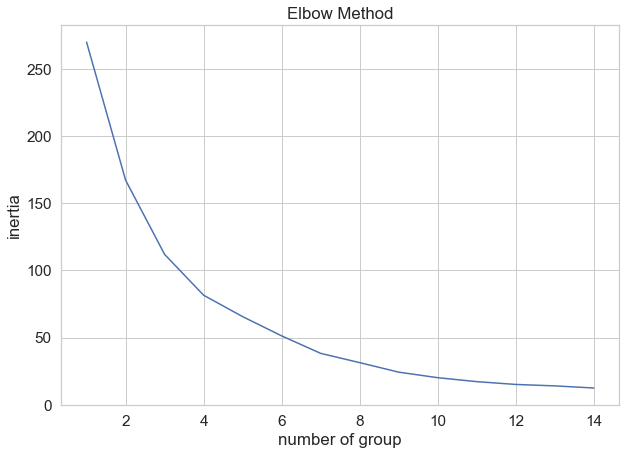

In [76]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number of group', y = 'inertia').set(title = "Elbow Method")
plt.show()

Based on the Elbow plot, we can choose 4 clusters.

The function of visualize grouping:

In [77]:
def plots_model():    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for x in rfm_df.groups.unique():        
        xs = rfm_df[rfm_df.groups == x]['Recency']
        zs = rfm_df[rfm_df.groups == x]['Frequency']
        ys = rfm_df[rfm_df.groups == x]['MonetaryValue']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label = x)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

**Model for 4 groups**

In [78]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model.fit_predict(df_norm)
df_norm['groups'] = groups
rfm_df['groups'] = groups

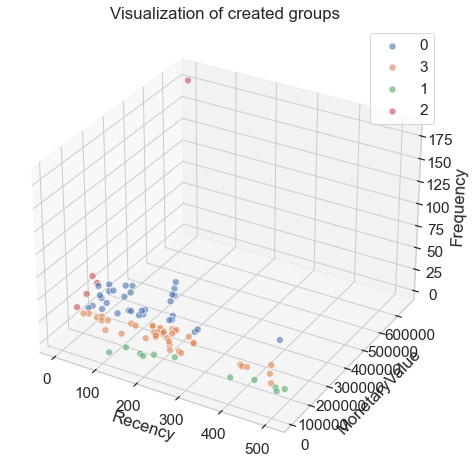

In [79]:
plots_model()

In [80]:
# adding column groups to DataFrame
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
0,195,51,157807.81,0
1,64,20,70488.44,3
2,264,26,94117.26,3
3,83,46,153996.13,0
4,187,7,24179.96,1


Distribution of the size of individual groups:

In [81]:
print((df_norm.groups.value_counts(normalize = True, sort = True) * 100).to_string())

3    46.666667
0    35.555556
1    12.222222
2     5.555556


In [82]:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,185.866667,27.9,99335.664889,1.633333


In [83]:
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,132.406250,36.437500,130895.744688
1,309.363636,10.272727,34302.302727
2,4.000000,64.400000,230667.666000
3,215.904762,21.666667,76687.675000


### Description of the results


**Interpretation of the resulting groups:**

From our analysis we obtained segmentation for four groups. We may interpret them as the following customer segments:

- **Group 0**: Customers who were shopping for a long time, buy moderately often and they shop for high amounts.
- **Group 1**: Customers who have been shopping recently, they rarely buy and make purchases for relatively small amounts.
- **Group 2**: Customers who have not been buying anything for a long time, they rarely buy and make purchases for relatively small amounts.
- **Group 3**: Customers who have been shopping recently, they buy often and make purchases for large amounts.

Based on the received groups we can name them as follows: 

- **Group 0** - former best customers - **departing**,
- **Group 1** - new and random customers - **new**,
- **Group 2** - old and random customers - **inactive**,
- **Group 3** - best customers - **active**.

### Summary

In this approach we tested a second method of customer segmentation. We have used raw calculated RFM variables and K-Means Clustering to determine segments of clients. From above analysis we have obtained the similar results to previous method, i.e. RFM scoring + K-means clustering. 